In [27]:
# pip install imagededup


In [102]:
image_dir=r'..\all_the_data'


In [128]:
from imagededup.methods import PHash
phasher = PHash()
image_dir=image_dir
# Generate encodings for all images in an image directory
encodings = phasher.encode_images(image_dir,recursive=True)

# Find duplicates using the generated encodings
duplicates = phasher.find_duplicates(encoding_map=encodings,max_distance_threshold = 6, recursive=True)



2025-07-14 22:48:40,150: INFO Start: Calculating hashes...
100%|██████████| 572/572 [00:25<00:00, 22.63it/s]
2025-07-14 22:49:06,292: INFO End: Calculating hashes!
2025-07-14 22:49:06,292: INFO Start: Evaluating hamming distances for getting duplicates
2025-07-14 22:49:06,292: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 572/572 [00:08<00:00, 68.71it/s]
2025-07-14 22:49:15,743: INFO End: Retrieving duplicates using BKTree algorithm
2025-07-14 22:49:15,743: INFO End: Evaluating hamming distances for getting duplicates


In [129]:
non_empty_count = sum(1 for v in duplicates.values() if len(v)>0)   # “if v” is True when the list is non‑empty
print(non_empty_count)

43


In [130]:
filtered_dict = {k: v for k, v in duplicates.items() if len(v) > 1}
filtered_dict


{'Normal\\Normal 143.jpg': ['Osteopenia\\Osteopenia 268.jpg',
  'Osteopenia\\Osteopenia 246.jpg'],
 'Osteopenia\\Osteopenia 249.jpg': ['Osteopenia\\Osteopenia 273.jpg',
  'Osteopenia\\Osteopenia 256.jpg',
  'Osteopenia\\Osteopenia 258.jpg'],
 'Osteopenia\\Osteopenia 256.jpg': ['Osteopenia\\Osteopenia 249.jpg',
  'Osteopenia\\Osteopenia 239.jpg'],
 'Osteopenia\\Osteopenia 268.jpg': ['Osteopenia\\Osteopenia 260.jpg',
  'Normal\\Normal 143.jpg'],
 'Osteopenia\\Osteopenia 273.jpg': ['Osteopenia\\Osteopenia 372.jpg',
  'Osteopenia\\Osteopenia 249.jpg'],
 'Osteopenia\\Osteopenia 369.jpg': ['Osteoporosis\\Osteoporosis 141.jpg',
  'Osteopenia\\Osteopenia 271.jpg'],
 'Osteopenia\\Osteopenia 372.jpg': ['Osteopenia\\Osteopenia 273.jpg',
  'Osteoporosis\\Osteoporosis 135.jpg',
  'Normal\\Normal 142.jpg'],
 'Osteoporosis\\Osteoporosis 141.jpg': ['Normal\\Normal 156.jpg',
  'Normal\\Normal 152.jpg',
  'Normal\\Normal 144.jpg',
  'Osteoporosis\\Osteoporosis 142.jpg',
  'Osteopenia\\Osteopenia 369.jpg

In [131]:
duplicates

{'Normal\\Normal 1.png': [],
 'Normal\\Normal 10.png': [],
 'Normal\\Normal 100.jpg': [],
 'Normal\\Normal 101.jpg': [],
 'Normal\\Normal 102.jpg': [],
 'Normal\\Normal 103.JPEG': [],
 'Normal\\Normal 104.JPEG': ['Osteoporosis\\Osteoporosis 179.JPEG'],
 'Normal\\Normal 105.jpg': [],
 'Normal\\Normal 106.jpg': [],
 'Normal\\Normal 107.jpg': [],
 'Normal\\Normal 108.jpg': [],
 'Normal\\Normal 109.jpg': ['Osteopenia\\Osteopenia 279.jpg'],
 'Normal\\Normal 11.png': [],
 'Normal\\Normal 110.jpg': [],
 'Normal\\Normal 111.png': [],
 'Normal\\Normal 112.png': [],
 'Normal\\Normal 113.jpg': [],
 'Normal\\Normal 114.jpg': [],
 'Normal\\Normal 115.JPEG': [],
 'Normal\\Normal 116.JPEG': [],
 'Normal\\Normal 117.jpg': [],
 'Normal\\Normal 118.jpg': [],
 'Normal\\Normal 119.jpg': [],
 'Normal\\Normal 12.jpg': [],
 'Normal\\Normal 120.jpg': [],
 'Normal\\Normal 121.JPEG': [],
 'Normal\\Normal 122.png': [],
 'Normal\\Normal 123.JPEG': [],
 'Normal\\Normal 124.jpg': [],
 'Normal\\Normal 125.jpg': [],


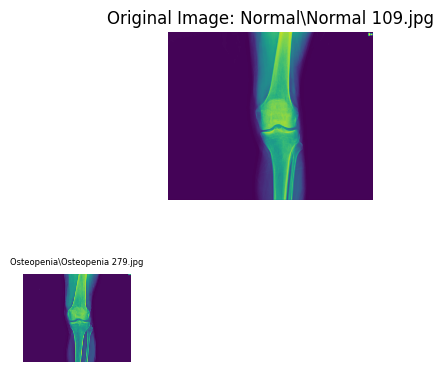

In [138]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir,
                duplicate_map=duplicates,
                filename='Normal\\Normal 109.jpg')

In [123]:
from imagededup.methods import PHash
# duplicates = phasher.find_duplicates(encoding_map=encodings,max_distance_threshold = 0, recursive=True)

# phasher = PHash()
duplicates_list = phasher.find_duplicates_to_remove(encoding_map=encodings,max_distance_threshold = 5, recursive=True)

2025-07-14 22:48:04,282: INFO Start: Evaluating hamming distances for getting duplicates
2025-07-14 22:48:04,283: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 598/598 [00:08<00:00, 72.73it/s]
2025-07-14 22:48:13,441: INFO End: Retrieving duplicates using BKTree algorithm
2025-07-14 22:48:13,441: INFO End: Evaluating hamming distances for getting duplicates


In [124]:
duplicates_list.__len__()

26

In [125]:
duplicates_list

['Normal\\Normal 520.jpg',
 'Osteoporosis\\Osteoporosis 178.png',
 'Normal\\Normal 408.jpg',
 'Osteoporosis\\Osteoporosis 485.jpg',
 'Osteoporosis\\Osteoporosis 437.jpg',
 'Osteopenia\\Osteopenia 262.jpg',
 'Osteoporosis\\Osteoporosis 507.jpg',
 'Normal\\Normal 454.jpg',
 'Osteoporosis\\Osteoporosis 102.png',
 'Osteoporosis\\Osteoporosis 127.jpg',
 'Normal\\Normal 576.jpg',
 'Osteopenia\\Osteopenia 370.jpg',
 'Normal\\Normal 433.jpg',
 'Osteoporosis\\Osteoporosis 297.jpg',
 'Normal\\Normal 550.jpg',
 'Osteoporosis\\Osteoporosis 600.jpg',
 'Normal\\Normal 427.jpg',
 'Osteoporosis\\Osteoporosis 486.jpg',
 'Normal\\Normal 499.jpg',
 'Osteoporosis\\Osteoporosis 147.JPEG',
 'Normal\\Normal 452.jpg',
 'Normal\\Normal 545.jpg',
 'Osteoporosis\\Osteoporosis 176.png',
 'Normal\\Normal 514.jpg',
 'Normal\\Normal 437.jpg',
 'Normal\\Normal 159.jpg']

# removing the images

In [126]:
import os
os.path.join(image_dir,"train")

'..\\all_the_data\\train'

In [127]:
import os
import shutil
# List of image filenames to remove
images_to_remove = duplicates_list

# Paths
source_folder =os.path.join(image_dir)  # Folder containing the images
destination_folder = os.path.join(source_folder, "deleted_images")  # Folder for moved images

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Move files
for image_name in images_to_remove:
    source_path = os.path.join(source_folder, image_name)
    destination_path = os.path.join(destination_folder, image_name)
    
    try:
        # Ensure the destination subfolder exists
        destination_subfolder = os.path.dirname(destination_path)
        os.makedirs(destination_subfolder, exist_ok=True)
        print(f"fff{source_path}")
        if os.path.exists(source_path):
            shutil.move(source_path, destination_path)
            print(f"Moved: {image_name} to {destination_folder}")
        else:
            print(f"File not found: {image_name}")
    except Exception as e:
        print(f"Error moving {image_name}: {e}")


fff..\all_the_data\Normal\Normal 520.jpg
Moved: Normal\Normal 520.jpg to ..\all_the_data\deleted_images
fff..\all_the_data\Osteoporosis\Osteoporosis 178.png
Moved: Osteoporosis\Osteoporosis 178.png to ..\all_the_data\deleted_images
fff..\all_the_data\Normal\Normal 408.jpg
Moved: Normal\Normal 408.jpg to ..\all_the_data\deleted_images
fff..\all_the_data\Osteoporosis\Osteoporosis 485.jpg
Moved: Osteoporosis\Osteoporosis 485.jpg to ..\all_the_data\deleted_images
fff..\all_the_data\Osteoporosis\Osteoporosis 437.jpg
Moved: Osteoporosis\Osteoporosis 437.jpg to ..\all_the_data\deleted_images
fff..\all_the_data\Osteopenia\Osteopenia 262.jpg
Moved: Osteopenia\Osteopenia 262.jpg to ..\all_the_data\deleted_images
fff..\all_the_data\Osteoporosis\Osteoporosis 507.jpg
Moved: Osteoporosis\Osteoporosis 507.jpg to ..\all_the_data\deleted_images
fff..\all_the_data\Normal\Normal 454.jpg
Moved: Normal\Normal 454.jpg to ..\all_the_data\deleted_images
fff..\all_the_data\Osteoporosis\Osteoporosis 102.png
Mov

# we need to add logic that if image was in 2 classes(normal and osteo) to remove it from both of them